# Stock Market Prediction by Using Machine Learning and Deep Learning

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout


# Data

In [2]:
pip install yfinance

In [3]:
import yfinance as yf

ticker = 'AAPL'
data = yf.download(ticker, period='10y')  # or '1d', '1mo', etc.
data

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-05-18,29.158237,29.276940,28.748378,28.752858,203531600
2015-05-19,29.131372,29.312785,29.035065,29.270231,178532800
2015-05-20,29.129118,29.335167,28.967862,29.115681,145819600
2015-05-21,29.427004,29.480757,29.077616,29.131369,158921600
2015-05-22,29.684561,29.780868,29.429239,29.474035,182384000
...,...,...,...,...,...
2025-05-12,210.789993,211.270004,206.750000,210.970001,63775800
2025-05-13,212.929993,213.399994,209.000000,210.429993,51909300


In [ ]:
df = data

In [ ]:
df

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-04-27,29.624413,29.731612,29.289421,29.548482,387816800
2015-04-28,29.157663,30.046507,28.936571,30.028643,475696000
2015-04-29,28.728874,29.387690,28.652944,29.068333,253544400
2015-04-30,27.949457,28.728870,27.822160,28.728870,332781600
2015-05-01,28.798103,29.061632,27.982959,28.161620,234050400
...,...,...,...,...,...
2025-04-21,193.160004,193.800003,189.809998,193.270004,46742500
2025-04-22,199.740005,201.589996,195.970001,196.119995,52976400


In [ ]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-04-27,29.624413,29.731612,29.289421,29.548482,387816800
2015-04-28,29.157663,30.046507,28.936571,30.028643,475696000
2015-04-29,28.728874,29.387690,28.652944,29.068333,253544400
2015-04-30,27.949457,28.728870,27.822160,28.728870,332781600
2015-05-01,28.798103,29.061632,27.982959,28.161620,234050400


In [ ]:
df.columns

MultiIndex([( 'Close', 'AAPL'),
            (  'High', 'AAPL'),
            (   'Low', 'AAPL'),
            (  'Open', 'AAPL'),
            ('Volume', 'AAPL')],
           names=['Price', 'Ticker'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2015-04-27 to 2025-04-25
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   2516 non-null   float64
 1   (High, AAPL)    2516 non-null   float64
 2   (Low, AAPL)     2516 non-null   float64
 3   (Open, AAPL)    2516 non-null   float64
 4   (Volume, AAPL)  2516 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 117.9 KB


In [ ]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,2516.000000,2516.000000,2516.000000,2516.000000,2.516000e+03
mean,100.284910,101.290752,99.168860,100.185656,1.122377e+08
std,68.328760,68.999902,67.562857,68.244486,6.555556e+07
min,20.674538,20.978908,20.475437,20.596724,2.323470e+07
25%,37.227707,37.579467,36.803139,37.213502,6.858388e+07
50%,76.915371,77.489185,76.165704,76.733799,9.638440e+07
75%,159.174820,161.227922,157.022379,158.902891,1.366277e+08
max,258.735504,259.814335,257.347047,257.906429,6.488252e+08


In [ ]:
df.shape

(2516, 5)

# EDA

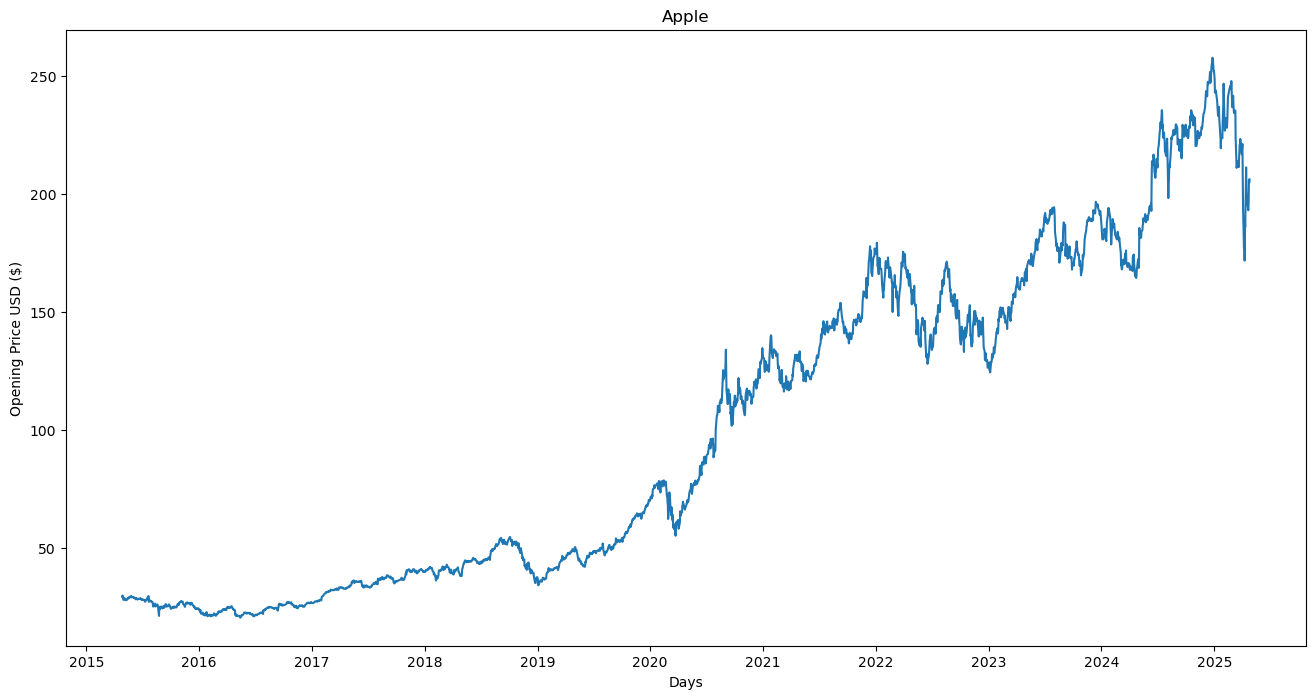

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Apple')
plt.xlabel('Days')
plt.ylabel('Opening Price USD ($)')
plt.plot(df['Open'])
plt.show()

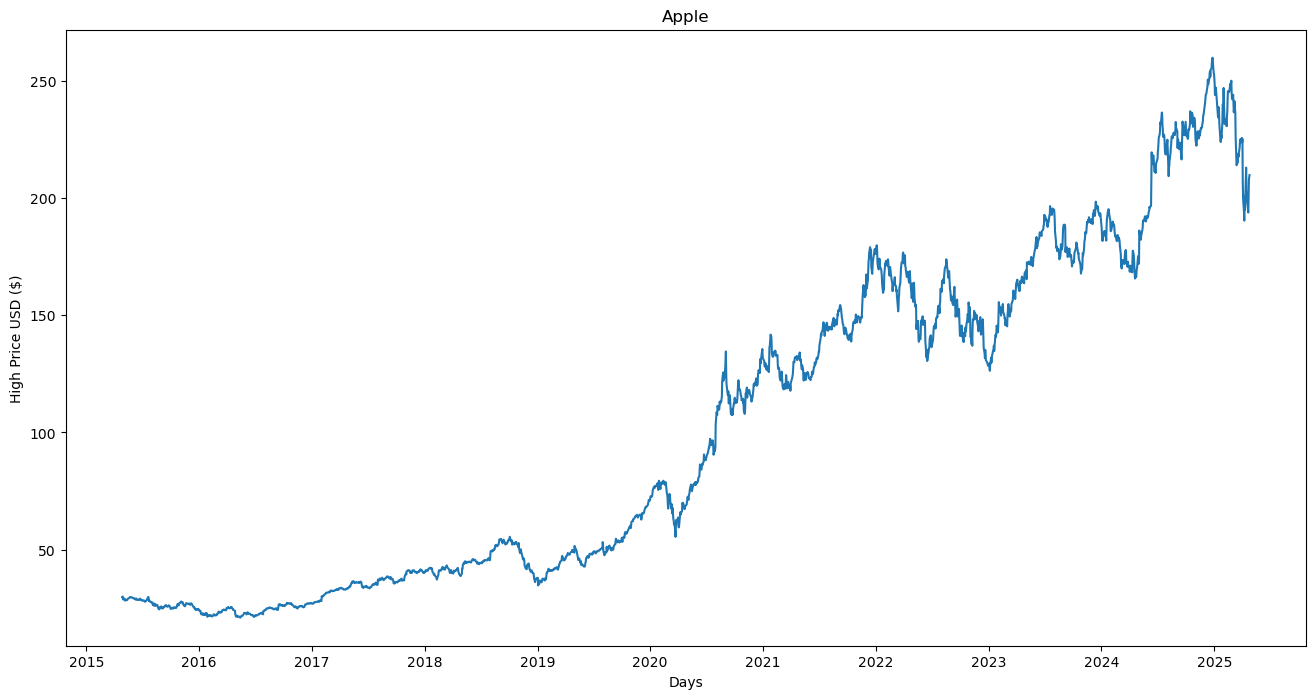

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Apple')
plt.xlabel('Days')
plt.ylabel('High Price USD ($)')
plt.plot(df['High'])
plt.show()

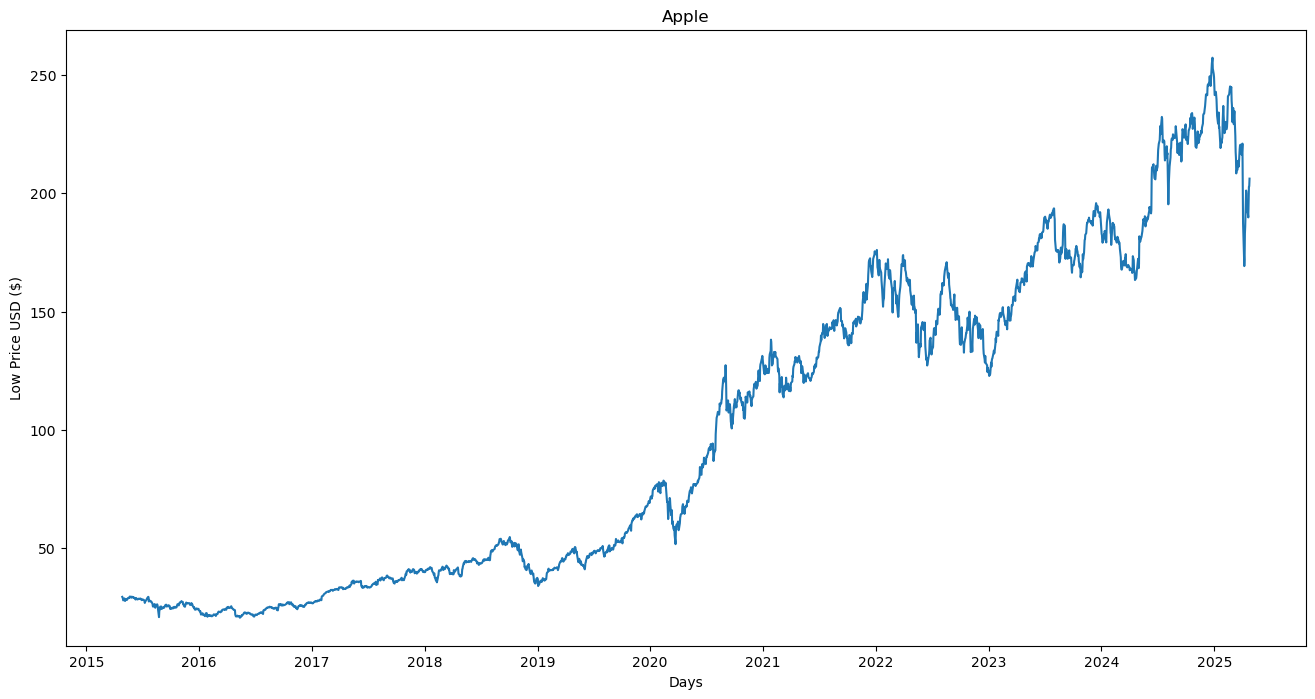

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Apple')
plt.xlabel('Days')
plt.ylabel('Low Price USD ($)')
plt.plot(df['Low'])
plt.show()

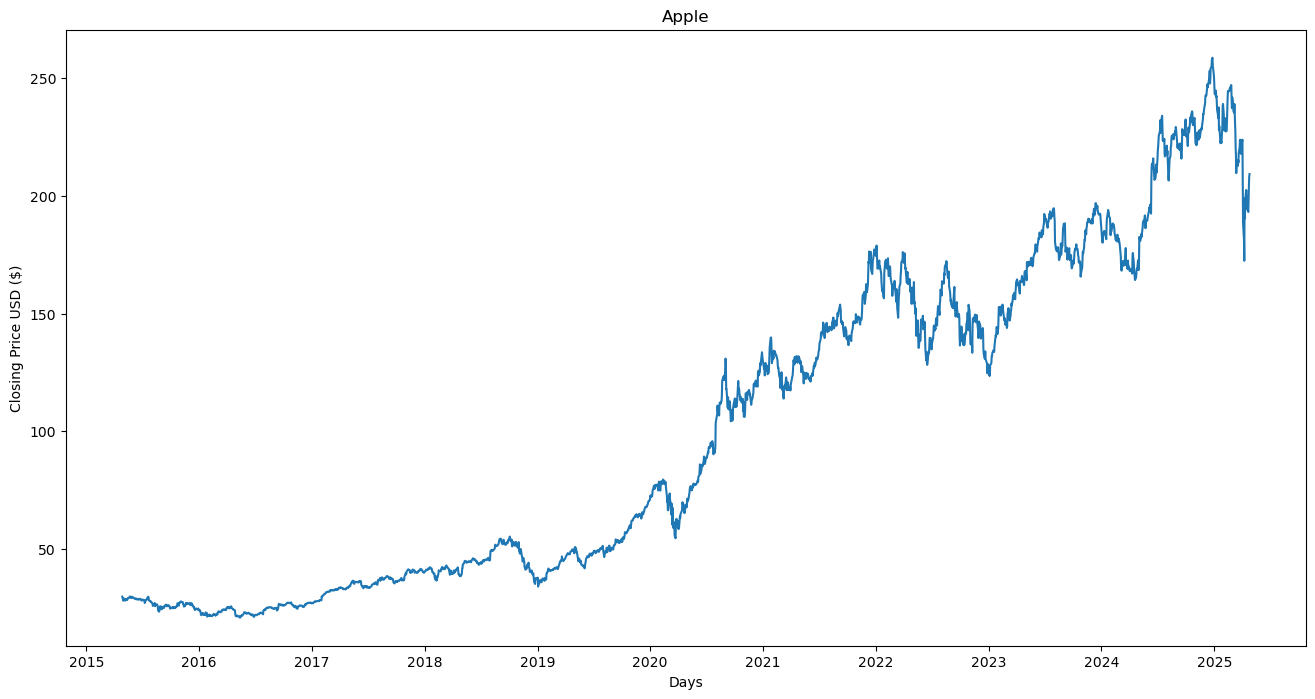

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Apple')
plt.xlabel('Days')
plt.ylabel('Closing Price USD ($)')
plt.plot(df['Close'])
plt.show()

In [ ]:
df2 = df['Close']

In [ ]:
df2.tail()

Ticker,AAPL
Date,
2025-04-21,193.160004
2025-04-22,199.740005
2025-04-23,204.600006
2025-04-24,208.369995
2025-04-25,209.279999


In [ ]:
df2 = pd.DataFrame(df2)

In [ ]:
df2.columns

Index(['AAPL'], dtype='object', name='Ticker')

In [ ]:
df2.tail()

Ticker,AAPL
Date,
2025-04-21,193.160004
2025-04-22,199.740005
2025-04-23,204.600006
2025-04-24,208.369995
2025-04-25,209.279999


In [ ]:
future_days = 100
df2['Prediction'] = df2['AAPL'].shift(-future_days)

In [ ]:
df2.tail()

Ticker,AAPL,Prediction
Date,,
2025-04-21,193.160004,NaN
2025-04-22,199.740005,NaN
2025-04-23,204.600006,NaN
2025-04-24,208.369995,NaN
2025-04-25,209.279999,NaN


In [ ]:
X = np.array(df2.drop(['Prediction'], axis=1))[:-future_days]
print(X)


[[ 29.62441254]
 [ 29.15766335]
 [ 28.72887421]
 ...
 [232.61424255]
 [234.80183411]
 [234.67198181]]


In [ ]:
y = np.array(df2['Prediction'])[:-future_days]
print(y)

[ 25.66340065  25.55751991  25.9540062  ... 204.6000061  208.36999512
 209.27999878]


# Linear and Decision Tree Regression

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression


In [ ]:
tree = DecisionTreeRegressor().fit(x_train, y_train)
lr = LinearRegression().fit(x_train, y_train)



In [ ]:
y_pred = lr.predict(x_test)
accuracy = lr.score(x_test,y_test)
print(accuracy)

0.9432513938554168


In [ ]:
pred = tree.predict(x_train)
acc= tree.score(x_test,y_test)
print(acc)

0.9121262758297131


In [ ]:
x_future = df2.drop(['Prediction'], axis=1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

array([[232.19960022],
       [226.807724  ],
       [229.76776123],
       [233.61483765],
       [234.03343201],
       [228.11332703],
       [223.42906189],
       [223.55863953],
       [223.20980835],
       [224.25630188],
       [217.80795288],
       [216.76148987],
       [217.22990417],
       [217.50897217],
       [218.06710815],
       [221.33610535],
       [217.6285553 ],
       [219.12355042],
       [208.5690155 ],
       [206.5358429 ],
       [209.11717224],
       [212.59547424],
       [215.51568604],
       [217.05229187],
       [220.78408813],
       [221.23309326],
       [224.22650146],
       [225.55358887],
       [225.3939209 ],
       [226.01257324],
       [225.90281677],
       [224.03691101],
       [226.34184265],
       [226.68109131],
       [227.52923584],
       [225.99261475],
       [229.28536987],
       [228.49710083],
       [222.28079224],
       [220.36500549],
       [221.89164734],
       [220.33506775],
       [220.42488098],
       [219

In [ ]:
tree_prediction = tree.predict(x_future)
print(tree_prediction)

[237.0693512  239.32685852 242.38349915 242.74310303 242.74310303
 242.57328796 246.47900391 246.47900391 246.21928406 242.43344116
 247.85748291 250.76428223 253.20159912 247.77757263 249.51565552
 254.21051025 254.98965454 228.26902771 258.73550415 255.30929565
 251.92301941 224.75288391 243.5821991  243.09272766 244.73092651
 241.94400024 242.43344116 236.58987427 234.14256287 233.02378845
 237.60874939 228.00930786 238.02999878 222.39547729 247.1000061
 223.41436768 222.5353241  229.60754395 235.48109436 235.74081421
 237.32905579 235.74081421 227.75958252 232.54432678 203.19000244
 235.48109436 227.38000488 227.6499939  232.61999512 235.74081421
 193.16000366 202.13999939 223.41436768 244.86999512 237.60874939
 245.55000305 247.1000061  247.03999329 240.36000061 238.02999878
 241.83999634 238.02999878 235.92999268 235.74000549 222.5353241
 239.07000732 234.80183411 220.72999573 216.97999573 209.67999268
 213.49000549 214.         212.69000244 215.24000549 214.1000061
 218.27000427

In [ ]:
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[244.56016589 239.01250812 242.05806645 246.01629221 246.44698056
 240.3558325  235.53623005 235.66955143 235.31064186 236.38737057
 229.75271652 228.67601921 229.15796689 229.44509769 230.01935929
 233.38280402 229.5681358  231.10632417 220.2468487  218.15493387
 220.81084273 224.38963948 227.39422174 228.97522303 232.81483798
 233.27681572 236.35670917 237.72213865 237.55785757 238.19438395
 238.08145641 236.16164109 238.53316658 238.88221677 239.75486581
 238.17384882 241.56173789 240.75069426 234.3547847  232.38364724
 233.95439667 232.35284454 232.44525265 231.62392575 234.24185716
 234.3547847  234.07757608 227.73300436 228.21550154 232.21938186
 240.61723158 239.92938306 238.15331368 239.07728486 238.05065371
 239.23128267 239.50845989 244.85721886 237.88638833 238.47156117
 237.33200248 238.49211201 233.24602871 237.43467816 241.30508011
 240.79174883 239.26208537 243.11195219 245.7298679  243.60473263
 243.98458552 246.91049686 248.42990845 247.79339777 242.55756634
 242.36251

In [ ]:
predictions = tree_prediction
valid = df2[X.shape[0]:]
valid['Predictions'] = predictions

C:\Users\DLK Groups\AppData\Local\Temp\ipykernel_9432\4118842179.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


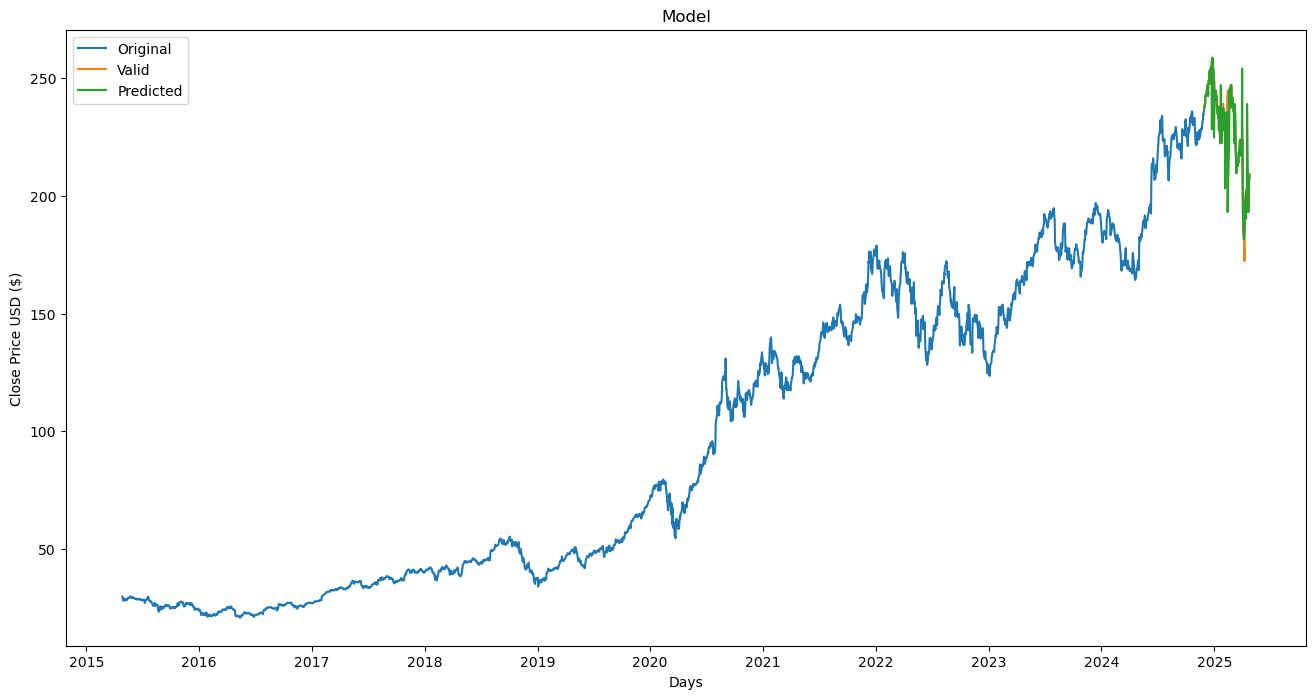

In [ ]:
plt.figure(figsize=(16,8))
plt.title("Model")
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df2['AAPL'])
plt.plot(valid[['AAPL', 'Predictions']])
plt.legend(["Original", "Valid", 'Predicted'])
plt.show()

In [ ]:
data.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in df.columns]

print(df.columns)


Index(['Close_AAPL', 'High_AAPL', 'Low_AAPL', 'Open_AAPL', 'Volume_AAPL'], dtype='object')


In [ ]:
df = data[['Close_AAPL']]
df.head()

,Close_AAPL
Date,
2015-04-27,29.624413
2015-04-28,29.157663
2015-04-29,28.728874
2015-04-30,27.949457
2015-05-01,28.798103


In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df)

In [ ]:
training_data_len = int(np.ceil(len(scaled_data) * 0.8))
train_data = scaled_data[:training_data_len]
x_train = []
y_train = []

In [ ]:
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])  # 60 time steps to predict
    y_train.append(train_data[i, 0])

In [ ]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [ ]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=25))
model.add(Dense(units=1))

C:\Users\DLK Groups\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(x_train, y_train, batch_size=32, epochs=10, validation_split=0.1)

Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - loss: 0.0173 - val_loss: 8.6071e-04
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0012 - val_loss: 0.0015
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 9.8904e-04 - val_loss: 7.2599e-04
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 7.8530e-04 - val_loss: 6.8863e-04
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 6.8005e-04 - val_loss: 6.0503e-04
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 6.4500e-04 - val_loss: 5.7637e-04
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 5.9448e-04 - val_loss: 0.0021
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 6.3521e-04 - val_loss: 5.9310e-04
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 4.7431e-04 - val_loss: 9.0114e-04
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 5.4587e-04 - val_loss: 7.8382e-04


In [ ]:
test_data = scaled_data[training_data_len - 60:, :]
x_test = []
y_test = df[training_data_len:].values

In [ ]:
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])  # 60 time steps to predict

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)  # Convert back to original scale

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step


In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, predictions))
r2 = r2_score(y_test, predictions)
print(f"LSTM RMSE: {rmse:.4f}")
print(f"LSTM R² Score: {r2:.4f}")

LSTM RMSE: 6.9342
LSTM R² Score: 0.9249


In [ ]:
train = df[:training_data_len]
valid = df[training_data_len:]
valid['Predictions'] = predictions

C:\Users\DLK Groups\AppData\Local\Temp\ipykernel_9432\3983594056.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


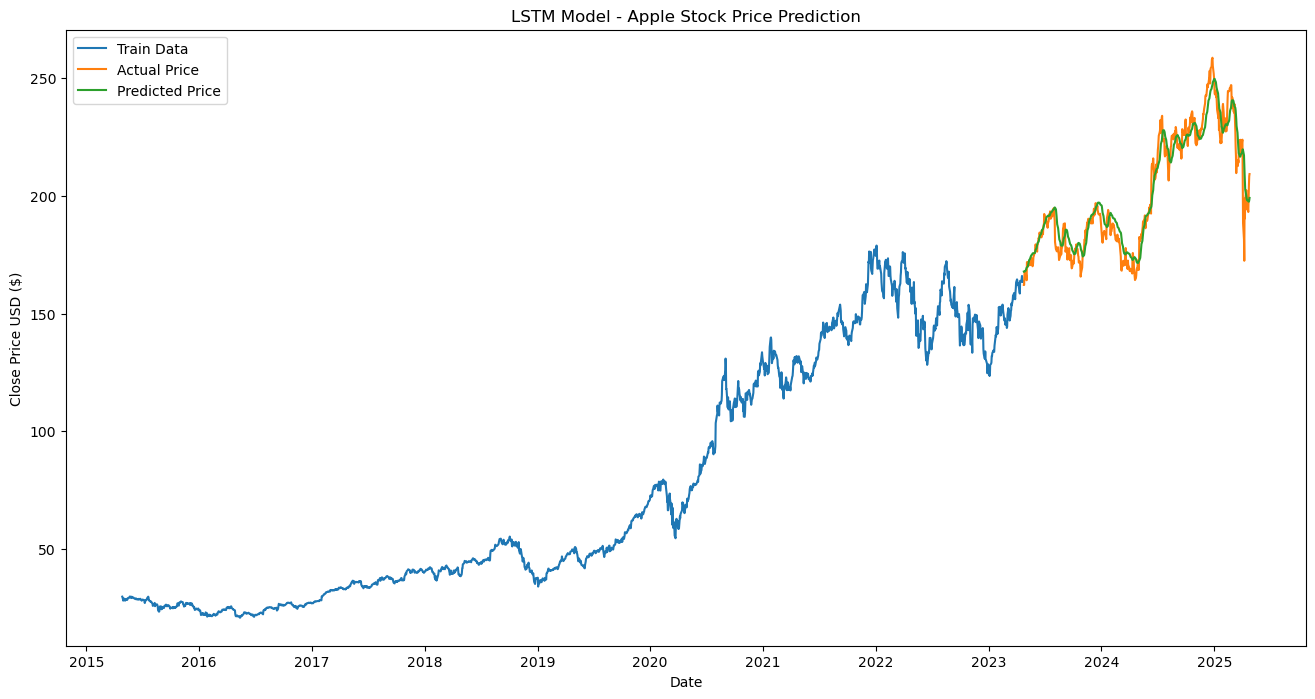

In [ ]:
plt.figure(figsize=(16, 8))
plt.title('LSTM Model - Apple Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train['Close_AAPL'], label='Train Data')
plt.plot(valid['Close_AAPL'], label='Actual Price')
plt.plot(valid['Predictions'], label='Predicted Price')
plt.legend()
plt.show()